In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Path to the data directory





In [1]:
data_dir = r"J:\projects\brain disease two\Alzheimer_MRI_4_classes_dataset"

# Parameters
img_height, img_width = 150, 150
batch_size = 32

In [3]:

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


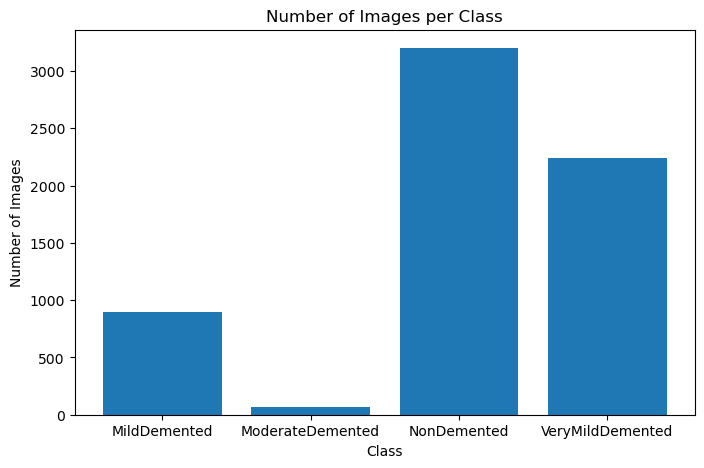

In [4]:
# Data exploration: Count images per class
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [5]:

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\shrir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Model summary
model.summary()

# Model training
history = model.fit(
    train_gen,
    epochs=8,
    validation_data=val_gen
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,486,606 (55.26 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,657,738 (36.84 MB)

Epoch 1/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 286ms/step - accuracy: 0.5115 - loss: 1.0306 - val_accuracy: 0.6099 - val_loss: 0.8583
Epoch 2/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 284ms/step - accuracy: 0.5910 - loss: 0.8666 - val_accuracy: 0.6716 - val_loss: 0.7152
Epoch 3/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 274ms/step - accuracy: 0.6874 - loss: 0.6846 - val_accuracy: 0.6841 - val_loss: 0.6690
Epoch 4/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 263ms/step - accuracy: 0.7500 - loss: 0.5513 - val_accuracy: 0.7201 - val_loss: 0.6131
Epoch 5/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 48s 297ms/step - accuracy: 0.8369 - loss: 0.4089 - val_accuracy: 0.7787 - val_loss: 0.5205
Epoch 6/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 46s 288ms/step - accuracy: 0.8936 - loss: 0.2714 - val_accuracy: 0.8217 - val_loss: 0.4723
Epoch 7/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 280ms/step - accuracy: 0.9257 - loss: 0.1933 - val_accuracy: 0.8233 - val_loss: 0.4640
Epoch 8/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 280ms/step - accuracy: 0.9129 - loss: 0.2092 - 

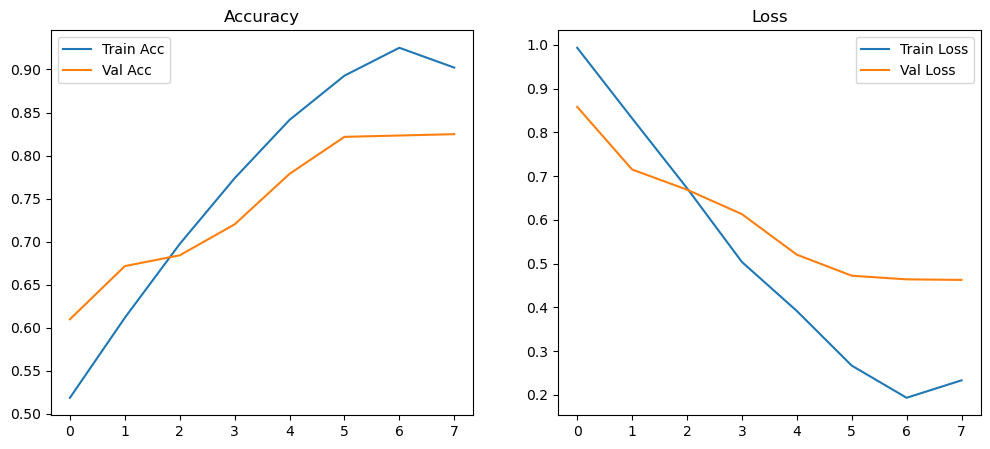

In [8]:


# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.preprocessing import image

# Save the trained CNN model
model.save('MRI_cnn_model.h5')

# Example: Predict on a single image from the dataset and show prediction with accuracy

# Get a sample image path from one of the classes


In [10]:
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred_probs = model.predict(img_array)
    pred_class_idx = np.argmax(pred_probs, axis=1)[0]
    pred_class = {v: k for k, v in train_gen.class_indices.items()}  # invert mapping
    predicted_label = pred_class[pred_class_idx]
    confidence = pred_probs[0][pred_class_idx]

    print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    return predicted_label, confidence

# Example usage:
predict_image(r"J:\projects\brain disease two\Data\Moderate Dementia\OAS1_0308_MR1_mpr-3_150.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: VeryMildDemented (Confidence: 0.99)


('VeryMildDemented', 0.9893562)

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model # Import load_model
from sklearn.metrics import jaccard_score, f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing import image
from IPython.display import display

# --- Section 1: Data Loading and Preprocessing ---
# Path to the data directory (assuming this remains the same as your original notebook)
data_dir = r"J:\projects\brain disease two\Alzheimer_MRI_4_classes_dataset"

# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Data generators (still needed to get class information for metrics calculation)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True # Shuffle for training
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False # Do NOT shuffle validation set for consistent metrics calculation
)

print(f"Train samples: {train_gen.samples}, Validation samples: {val_gen.samples}")

# --- Section 2: Load Pre-trained CNN Model ---
# Path to your saved .h5 model
model_path = r"C:\Users\shrir\Music\New folder\MRI\MRI_cnn_model.h5"

if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"Successfully loaded pre-trained model from: {model_path}")
    model.summary() # Display summary of the loaded model
else:
    print(f"Error: Model not found at {model_path}. Please ensure the path is correct.")
    # You might want to exit or raise an error here if the model is crucial.
    exit() # Exit if the model cannot be loaded

# --- Section 3: Prediction on a Single Image (Example) ---
def predict_image(img_path):
    if not os.path.exists(img_path):
        print(f"Image not found at: {img_path}. Skipping prediction example.")
        return

    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred_probs = model.predict(img_array)
    pred_class_idx = np.argmax(pred_probs, axis=1)[0]
    idx_to_class = {v: k for k, v in train_gen.class_indices.items()}
    predicted_label = idx_to_class[pred_class_idx]
    confidence = pred_probs[0][pred_class_idx]

    print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    return predicted_label, confidence

# Example usage (ensure this path is correct and accessible on your system)
sample_image_path = r"J:\projects\brain disease two\Data\Moderate Dementia\OAS1_0308_MR1_mpr-3_150.jpg"
predict_image(sample_image_path)

# --- Section 4: Metrics Calculation and Plotting ---

print("\n--- Calculating Performance Metrics ---")

# Get predictions and true labels from the validation generator
val_gen.reset() # Reset generator to ensure predictions start from the beginning
y_pred_probs = model.predict(val_gen, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels (integer class indices)
y_true = val_gen.classes

# Number of classes
num_classes = y_pred_probs.shape[1]
class_names = list(val_gen.class_indices.keys())

# Per-class metrics
# Added zero_division=0 to handle cases where a class might have no true samples or no predictions
iou_per_class = jaccard_score(y_true, y_pred, average=None, labels=range(num_classes))
f1_per_class = f1_score(y_true, y_pred, average=None, labels=range(num_classes), zero_division=0)
precision_per_class = precision_score(y_true, y_pred, average=None, labels=range(num_classes), zero_division=0)
recall_per_class = recall_score(y_true, y_pred, average=None, labels=range(num_classes), zero_division=0)

# Macro metrics (average across classes)
miou = jaccard_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
overall_accuracy = accuracy_score(y_true, y_pred) # Renamed from pixel_acc for clarity in classification

# Build metrics table
metrics_df = pd.DataFrame({
    'IoU': iou_per_class,
    'F1': f1_per_class,
    'Precision': precision_per_class,
    'Recall': recall_per_class
}, index=class_names)

# Add macro/mean row
metrics_df.loc['Macro/Mean'] = [miou, f1_macro, precision_macro, recall_macro]

# Add overall accuracy as a separate row
metrics_df.loc['Overall Accuracy'] = [overall_accuracy, np.nan, np.nan, np.nan]

# Display table
display(metrics_df)

# Plot line graph for per-class metrics
# Exclude the last two rows ('Macro/Mean' and 'Overall Accuracy') for per-class plot
metrics_df.iloc[:-2].plot(marker='o', figsize=(10, 6))
plt.title('Per-Class Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics like F1, Precision, Recall are typically between 0 and 1
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('per_class_metrics_line_plot.png')
plt.close() # Close the plot to free memory

print("\nPerformance metrics table and line plot generated successfully.")
print("The plots are saved as 'class_distribution.png', 'training_history.png', and 'per_class_metrics_line_plot.png'.")

c:\Users\shrir\.conda\envs\tf_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Train samples: 5121, Validation samples: 1279


Successfully loaded pre-trained model from: C:\Users\shrir\Music\New folder\MRI\MRI_cnn_model.h5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,870 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted: VeryMildDemented (Confidence: 0.99)

--- Calculating Performance Metrics ---


c:\Users\shrir\.conda\envs\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step


,IoU,F1,Precision,Recall
MildDemented,0.591837,0.743590,0.872180,0.648045
ModerateDemented,0.000000,0.000000,0.000000,0.000000
NonDemented,0.773913,0.872549,0.914384,0.834375
VeryMildDemented,0.669421,0.801980,0.720641,0.904018
Macro/Mean,0.508793,0.604530,0.626801,0.596609
Overall Accuracy,0.824863,NaN,NaN,NaN



Performance metrics table and line plot generated successfully.
The plots are saved as 'class_distribution.png', 'training_history.png', and 'per_class_metrics_line_plot.png'.
